# Model comparison using Random with different RNN sparsity value

Shun Li, 03/07/24

## Load pickle files and packages

In [1]:
import torch
import torch.nn as nn

from EPLHb import EPLHb, gd, adam, NeuronalData

import numpy as np
from scipy import stats
import pickle

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True

In [123]:
# Optinal: load pickle file
date = '20240313'
filename = 'results/Random/'+date+'/model_comparison_'+date+'.pkl'
with open(filename, 'rb') as f:
    loaded_dict = pickle.load(f)

training_loss_summary, relearn_loss_summary = loaded_dict

# LHb_sparsity = [0, 0.2, 0.4, 0.6, 0.8, 1]
# LHb_network = ['RNN0','RNN0.2','RNN0.4','RNN0.6','RNN0.8','RNN1']
LHb_network = ['MLP','RNN']

EP_LHb = ['random','dales-law']
LHb_DAN = ['real','mixed','dales-law']
update_methods = ['corelease','fixed-sign']

## Overall learning curves

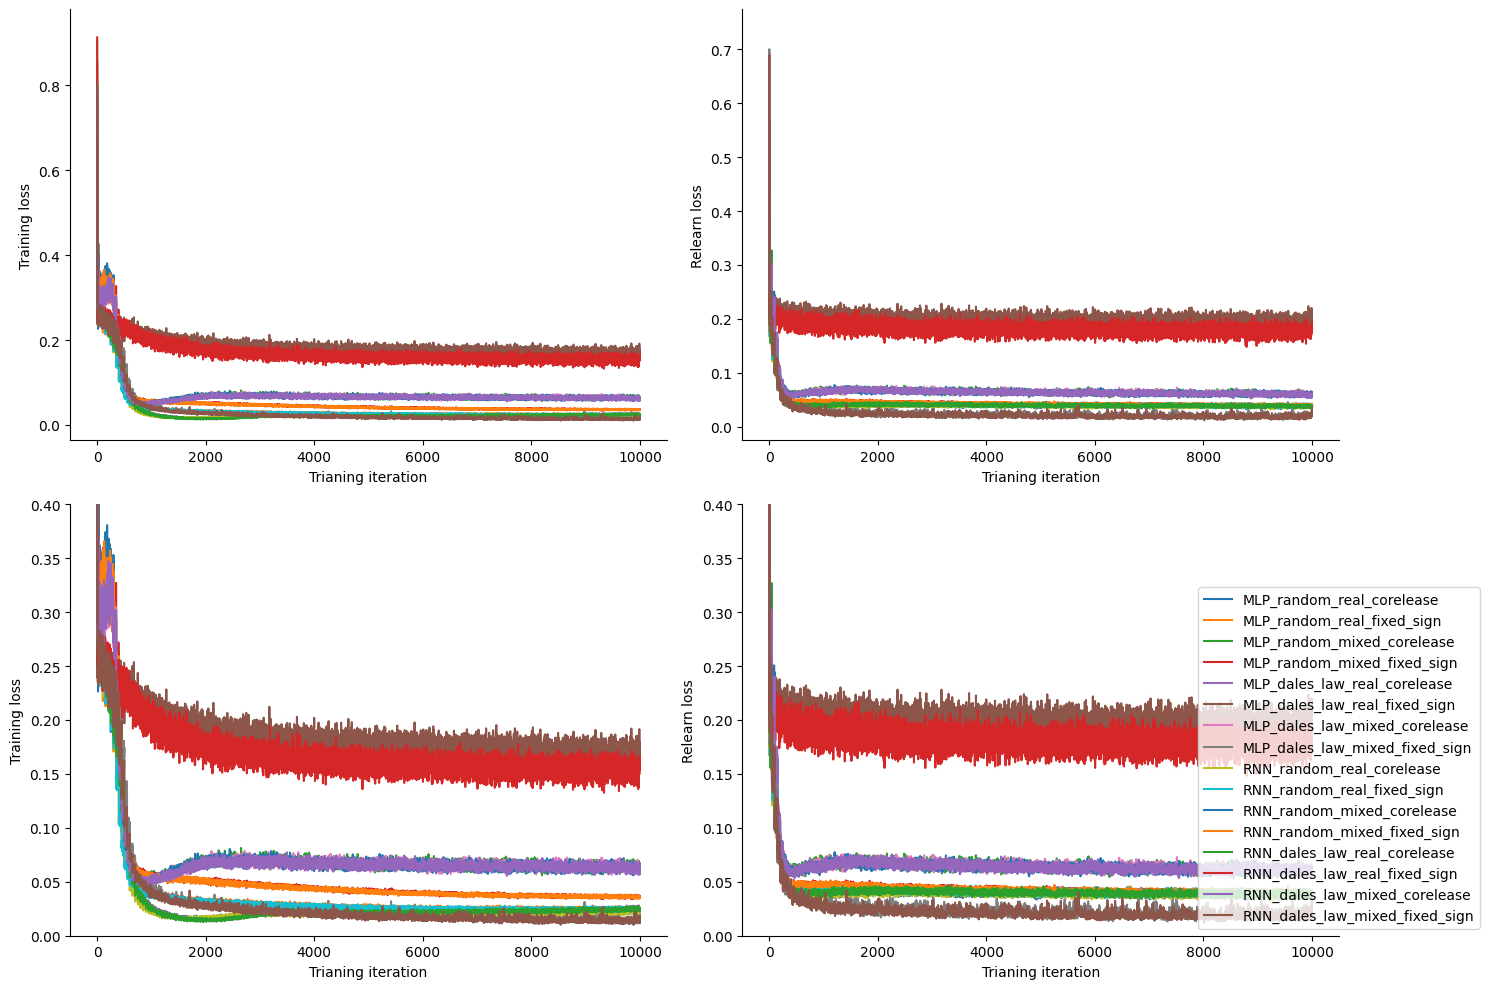

In [124]:
# Plot loss and accuracy for each network

fig, axs = plt.subplots(2,2,figsize=(15, 10))

for network in training_loss_summary:
    mean_tloss = np.mean(training_loss_summary[network],axis=0)
    sem_tloss = stats.sem(training_loss_summary[network])
    mean_rloss = np.mean(relearn_loss_summary[network],axis=0)
    sem_rloss = stats.sem(relearn_loss_summary[network])

    x = np.linspace(1,mean_tloss.shape[0],num=mean_tloss.shape[0],dtype='int32')
    axs[0,0].plot(mean_tloss, label=network)
    axs[0,0].fill_between(x,mean_tloss+sem_tloss,mean_tloss-sem_tloss,alpha=0.2)
    axs[0,0].set_xlabel('Trianing iteration')
    axs[0,0].set_ylabel('Training loss')

    axs[1,0].plot(mean_tloss, label=network)
    axs[1,0].fill_between(x,mean_tloss+sem_tloss,mean_tloss-sem_tloss,alpha=0.2)
    axs[1,0].set_xlabel('Trianing iteration')
    axs[1,0].set_ylabel('Training loss')
    axs[1,0].set_ylim([0, 0.4])

    # Plot accuracy
    x = np.linspace(1,mean_rloss.shape[0],num=mean_rloss.shape[0],dtype='int32')
    axs[0,1].plot(mean_rloss, label=network)
    axs[0,1].fill_between(x,mean_rloss+sem_rloss,mean_rloss-sem_rloss,alpha=0.2)
    axs[0,1].set_xlabel('Trianing iteration')
    axs[0,1].set_ylabel('Relearn loss')

    axs[1,1].plot(mean_rloss, label=network)
    axs[1,1].fill_between(x,mean_rloss+sem_rloss,mean_rloss-sem_rloss,alpha=0.2)
    axs[1,1].set_xlabel('Trianing iteration')
    axs[1,1].set_ylabel('Relearn loss')
    axs[1,1].set_ylim([0, 0.4])


plt.legend(bbox_to_anchor=(1, 0), loc='lower center')
plt.show()

In [125]:
mean_tloss, mean_rloss = [],[]
for network in training_loss_summary:
    mean_tloss.append(np.mean(training_loss_summary[network],axis=1))
for network in relearn_loss_summary:
    mean_rloss.append(np.mean(relearn_loss_summary[network],axis=1))

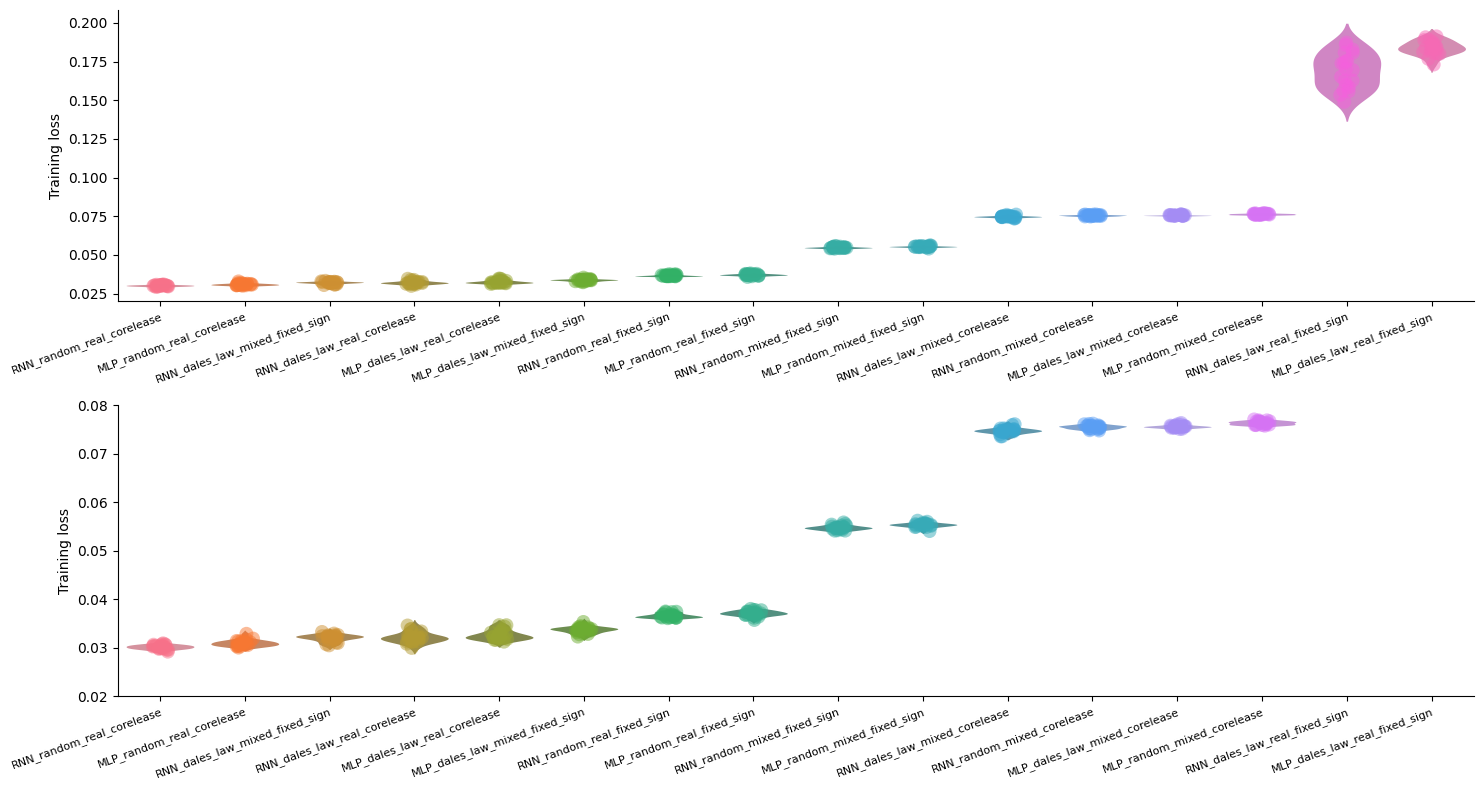

In [127]:
# Plot bar plots of different conditions

fig, axs = plt.subplots(2,1,figsize=(15, 8))
label_rotation = 20
font_size = 8

# Sort loss
sorted_idx = np.argsort(np.mean(mean_tloss,axis=1))
mean_tloss_sorted = np.array(mean_tloss)[sorted_idx].T
sorted_keys_loss = np.array(list(training_loss_summary.keys()))[sorted_idx]
# Plot loss
sns.violinplot(data=mean_tloss_sorted, ax=axs[0],saturation=0.5,linewidth=0)
sns.stripplot(data=mean_tloss_sorted, ax=axs[0], s=10, alpha=0.5)
axs[0].set_xticks(np.arange(len(sorted_keys_loss)))
axs[0].set_xticklabels(sorted_keys_loss,fontsize=font_size)
axs[0].set_ylabel('Training loss')
plt.setp(axs[0].get_xticklabels(), rotation=label_rotation, ha="right",rotation_mode="anchor")


# Plot with zoomed in y-axis
# Plot loss
# axs[1].violinplot(mean_tloss_sorted)
sns.violinplot(data=mean_tloss_sorted, ax=axs[1],saturation=0.5,linewidth=0)
sns.stripplot(data=mean_tloss_sorted, ax=axs[1], s=10, alpha=0.5)
axs[1].set_xticks(np.arange(len(sorted_keys_loss)))
axs[1].set_xticklabels(sorted_keys_loss,fontsize=font_size)
axs[1].set_ylabel('Training loss')
axs[1].set_ylim([0.02,0.08])
plt.setp(axs[1].get_xticklabels(), rotation=label_rotation, ha="right",rotation_mode="anchor")

plt.show()

In [94]:
sorted_keys_loss

array(['RNN0.4_random_real_corelease', 'RNN0.2_random_real_corelease',
       'RNN0.6_random_real_corelease', 'RNN1_random_real_corelease',
       'RNN0.8_random_real_corelease', 'RNN0_random_real_corelease',
       'RNN1_dales-law_real_corelease', 'RNN0.4_dales-law_real_corelease',
       'RNN0.2_dales-law_real_corelease',
       'RNN0.6_dales-law_real_corelease',
       'RNN0.8_dales-law_real_corelease', 'RNN0_dales-law_real_corelease',
       'RNN0.6_dales-law_dales-law_fixed-sign',
       'RNN0.6_dales-law_mixed_fixed-sign',
       'RNN0.8_dales-law_mixed_fixed-sign',
       'RNN0.4_dales-law_dales-law_fixed-sign',
       'RNN1_dales-law_mixed_fixed-sign',
       'RNN0.4_dales-law_mixed_fixed-sign',
       'RNN1_dales-law_dales-law_fixed-sign',
       'RNN0.2_dales-law_dales-law_fixed-sign',
       'RNN0.8_dales-law_dales-law_fixed-sign',
       'RNN0.2_dales-law_mixed_fixed-sign',
       'RNN0_dales-law_dales-law_fixed-sign',
       'RNN0_dales-law_mixed_fixed-sign', 'RNN0.8_rando

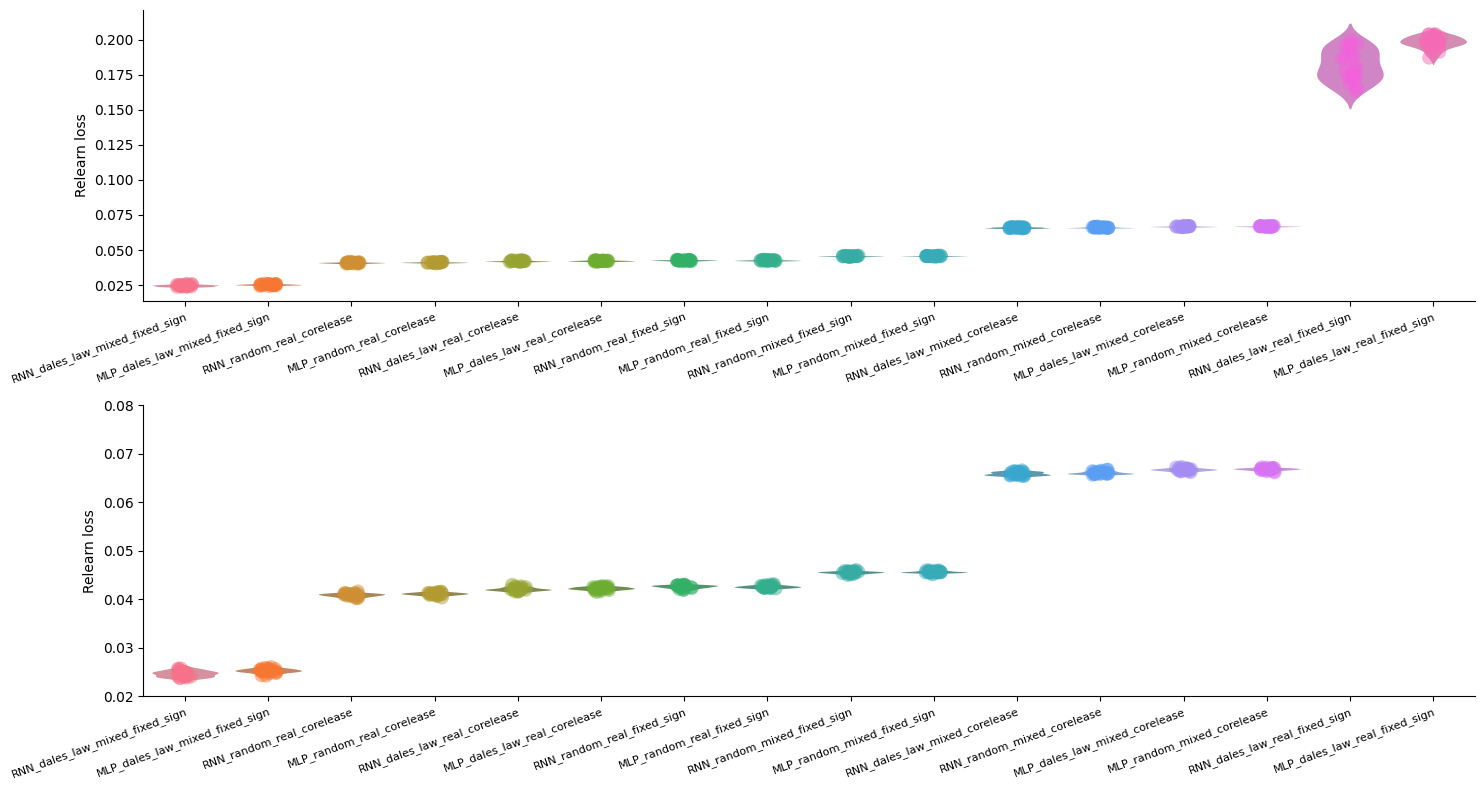

In [128]:
# Plot bar plots of accurarcy

fig, axs = plt.subplots(2,1,figsize=(15, 8))
label_rotation = 20
font_size = 8

# Sort accuracy 
sorted_idx = np.argsort(np.mean(mean_rloss,axis=1))
mean_rloss_sorted = np.array(mean_rloss)[sorted_idx].T
sorted_keys_rloss = np.array(list(relearn_loss_summary.keys()))[sorted_idx]
# Plot accuracy
sns.violinplot(data=mean_rloss_sorted, ax=axs[0],saturation=0.5,linewidth=0)
sns.stripplot(data=mean_rloss_sorted, ax=axs[0], s=10, alpha=0.5)
axs[0].set_xticks(np.arange(len(sorted_keys_rloss)))
axs[0].set_xticklabels(sorted_keys_rloss, fontsize=font_size)
axs[0].set_ylabel('Relearn loss')
plt.setp(axs[0].get_xticklabels(), rotation=label_rotation, ha="right",rotation_mode="anchor")

# Plot accuracy
sns.violinplot(data=mean_rloss_sorted, ax=axs[1],saturation=0.5,linewidth=0)
sns.stripplot(data=mean_rloss_sorted, ax=axs[1], s=10, alpha=0.5)
axs[1].set_xticks(np.arange(len(sorted_keys_rloss)))
axs[1].set_xticklabels(sorted_keys_rloss, fontsize=font_size)
axs[1].set_ylabel('Relearn loss')
axs[1].set_ylim([0.02,0.08])
plt.setp(axs[1].get_xticklabels(), rotation=label_rotation, ha="right",rotation_mode="anchor")
plt.show()

## Heatmaps between different conditions

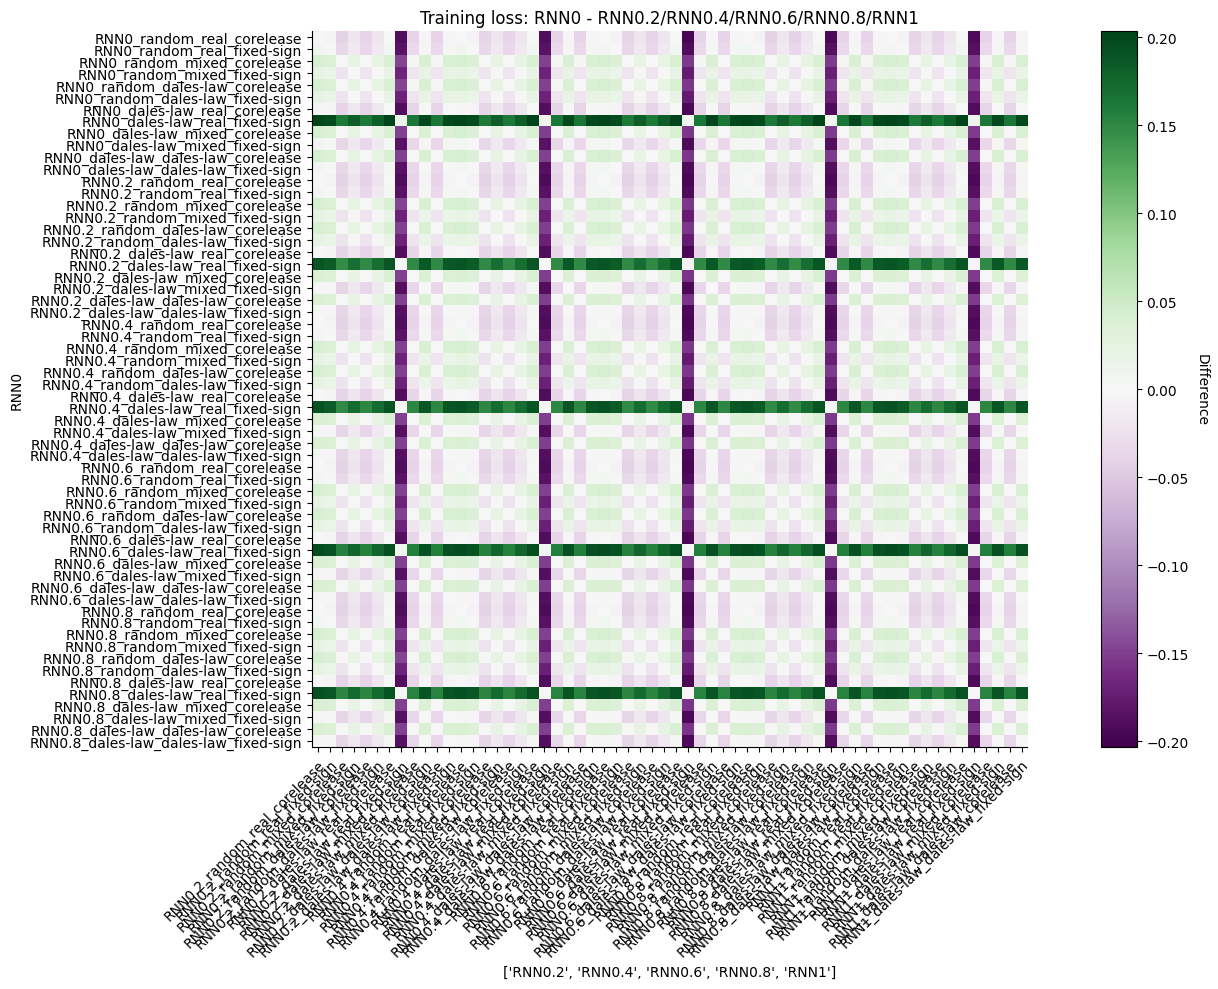

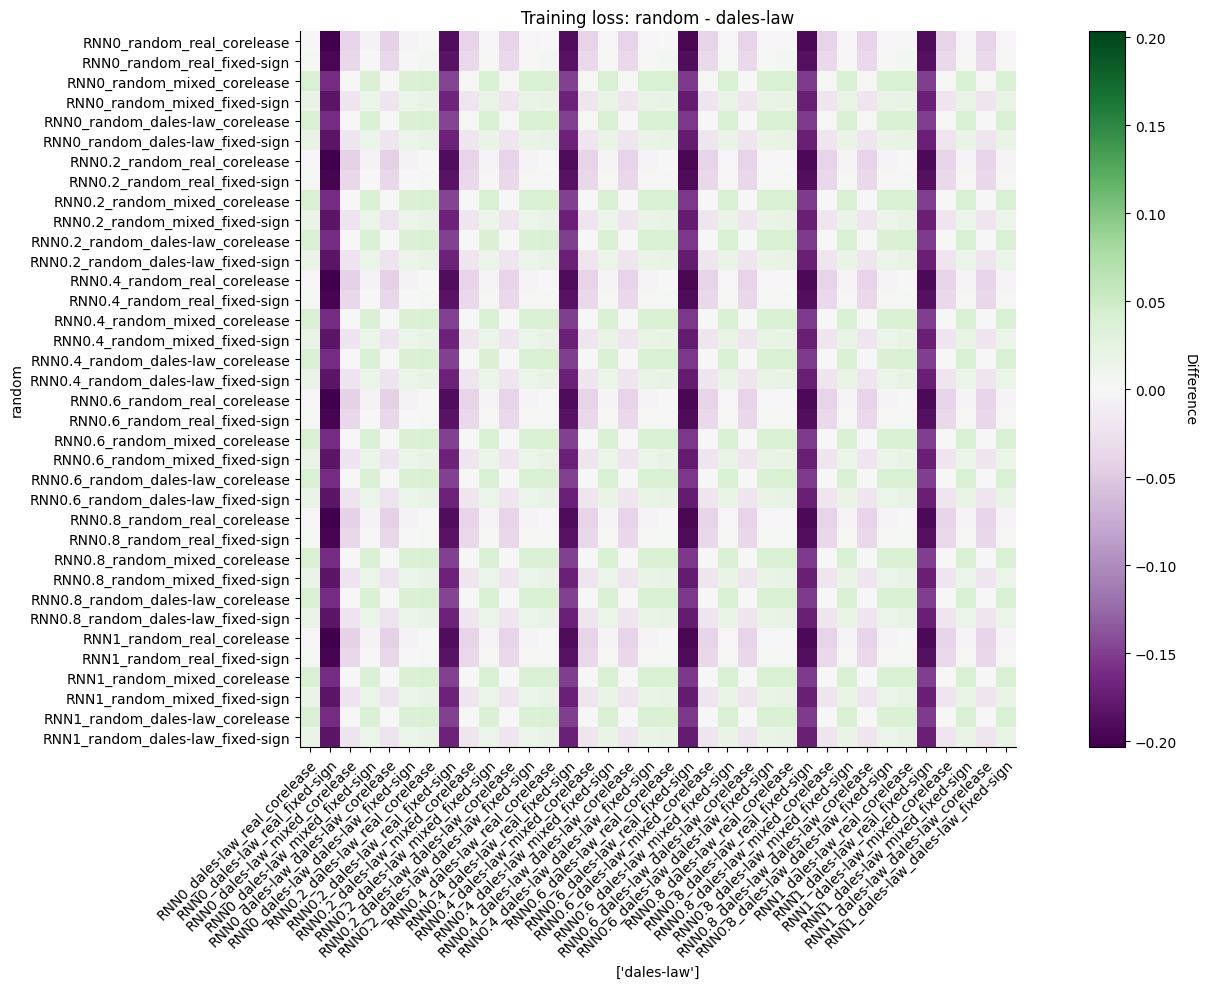

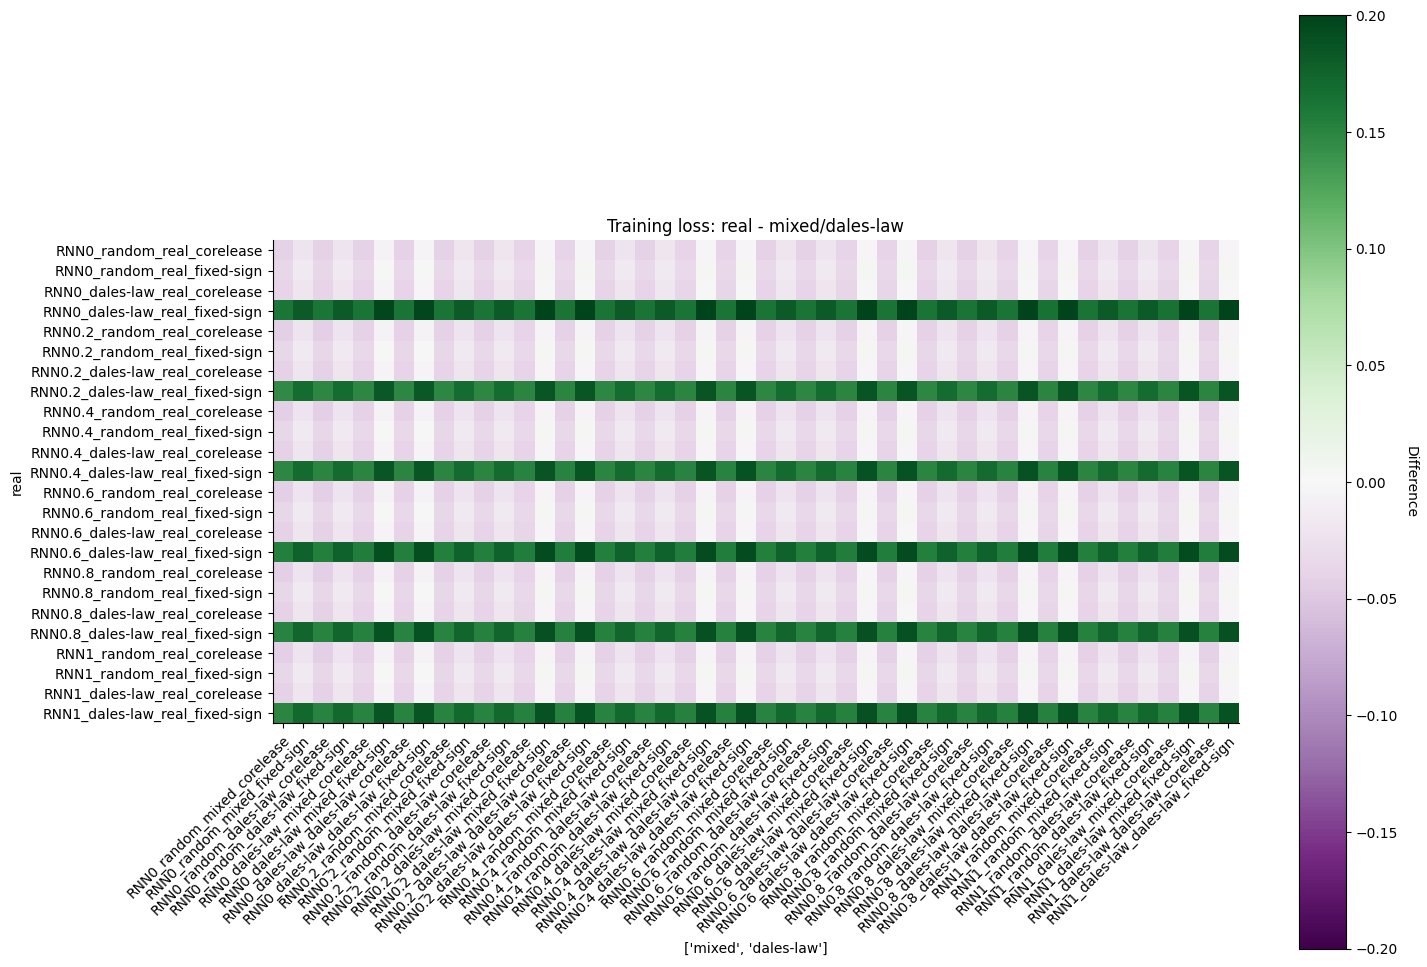

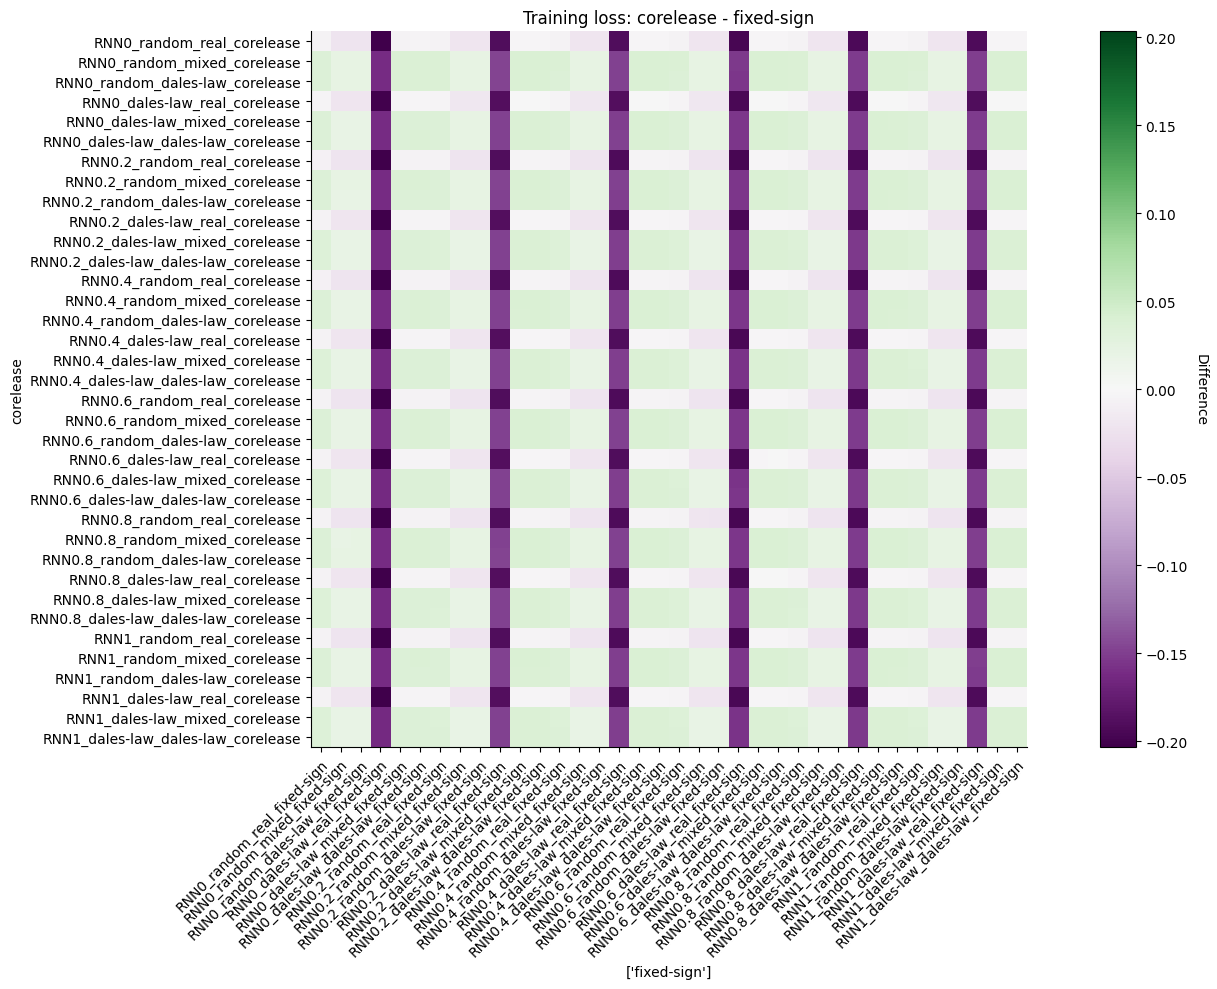

In [121]:
# Plot heatmaps to plot differences between conditions

conditions = [LHb_network, EP_LHb, LHb_DAN, update_methods]

for i, condition in enumerate(conditions):
    fig, axs = plt.subplots(1,1,figsize=(15, 10))
    # Choose network that satisfies condition
    cond_1 = condition[0]
    cond_1_networks = [network for network in training_loss_summary if cond_1 in network.split('_')[i]]
    cond_2 = condition[1:]
    cond_2_networks = [network for network in training_loss_summary if any(c in network.split('_')[i] for c in cond_2)]

    x = np.array(np.mean([np.mean(training_loss_summary[network],axis=1) for network in cond_1_networks],axis=1)).squeeze()
    y = np.array(np.mean([np.mean(training_loss_summary[network],axis=1) for network in cond_2_networks],axis=1)).squeeze()

    x_reshape = x[:,np.newaxis]
    y_reshape = y[np.newaxis,:]
    diff = x_reshape - y_reshape

    # Plot heatmap
    im = axs.imshow(diff, cmap='PRGn',vmax=abs(diff).max(), vmin=-abs(diff).max())
    axs.set_xticks(np.arange(len(cond_2_networks)))
    axs.set_yticks(np.arange(len(cond_1_networks)))
    axs.set_xticklabels(cond_2_networks)
    axs.set_yticklabels(cond_1_networks)
    axs.set_xlabel(cond_2)
    axs.set_ylabel(cond_1)
    # Rotate the tick labels and set their alignment.
    plt.setp(axs.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Set colorbar
    cbar = axs.figure.colorbar(im, ax=axs)
    cbar.ax.set_ylabel('Difference', rotation=-90, va="bottom")
    # Set title
    axs.set_title('Training loss: '+cond_1+' - '+'/'.join(cond_2))

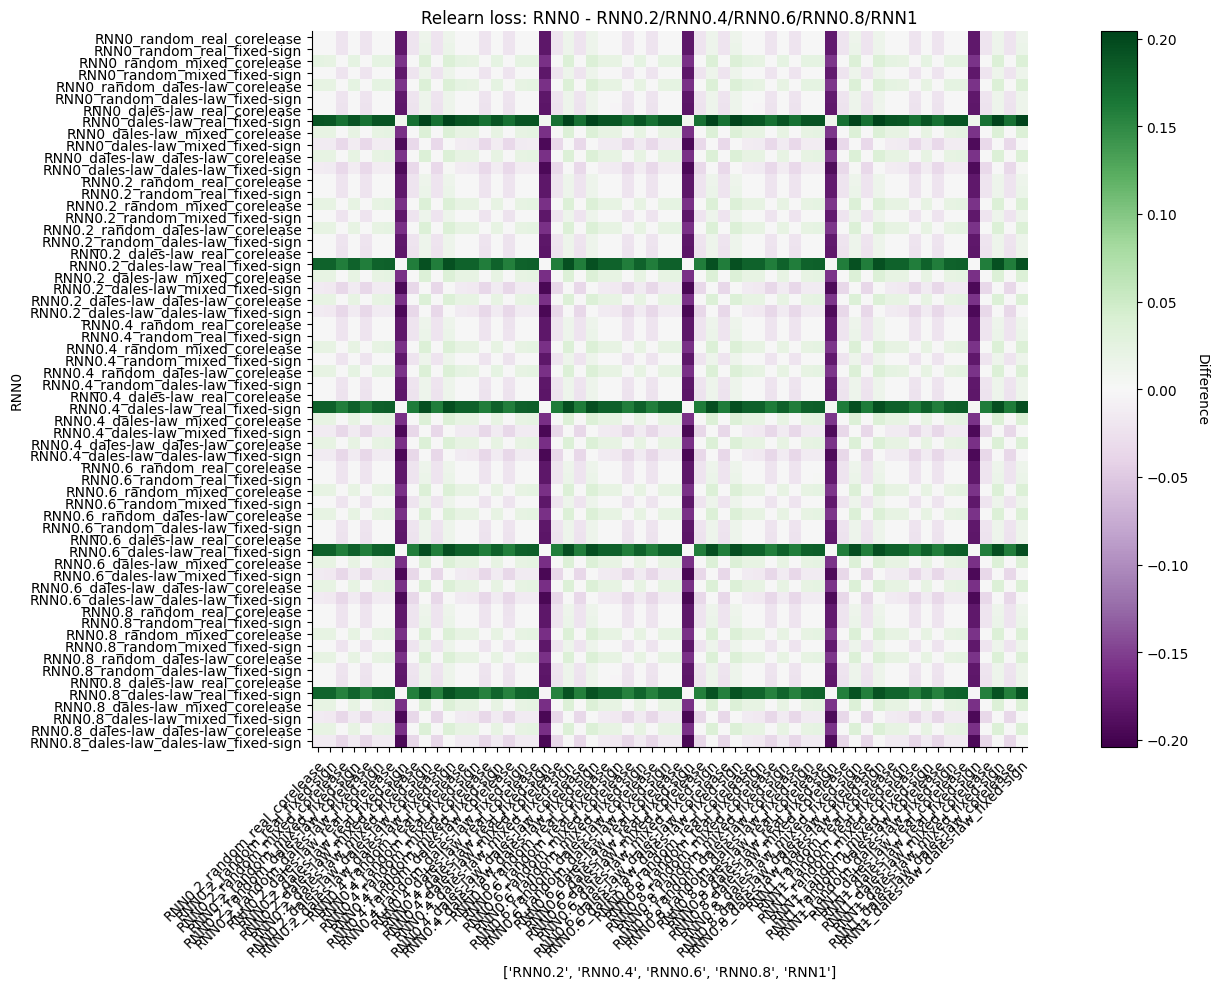

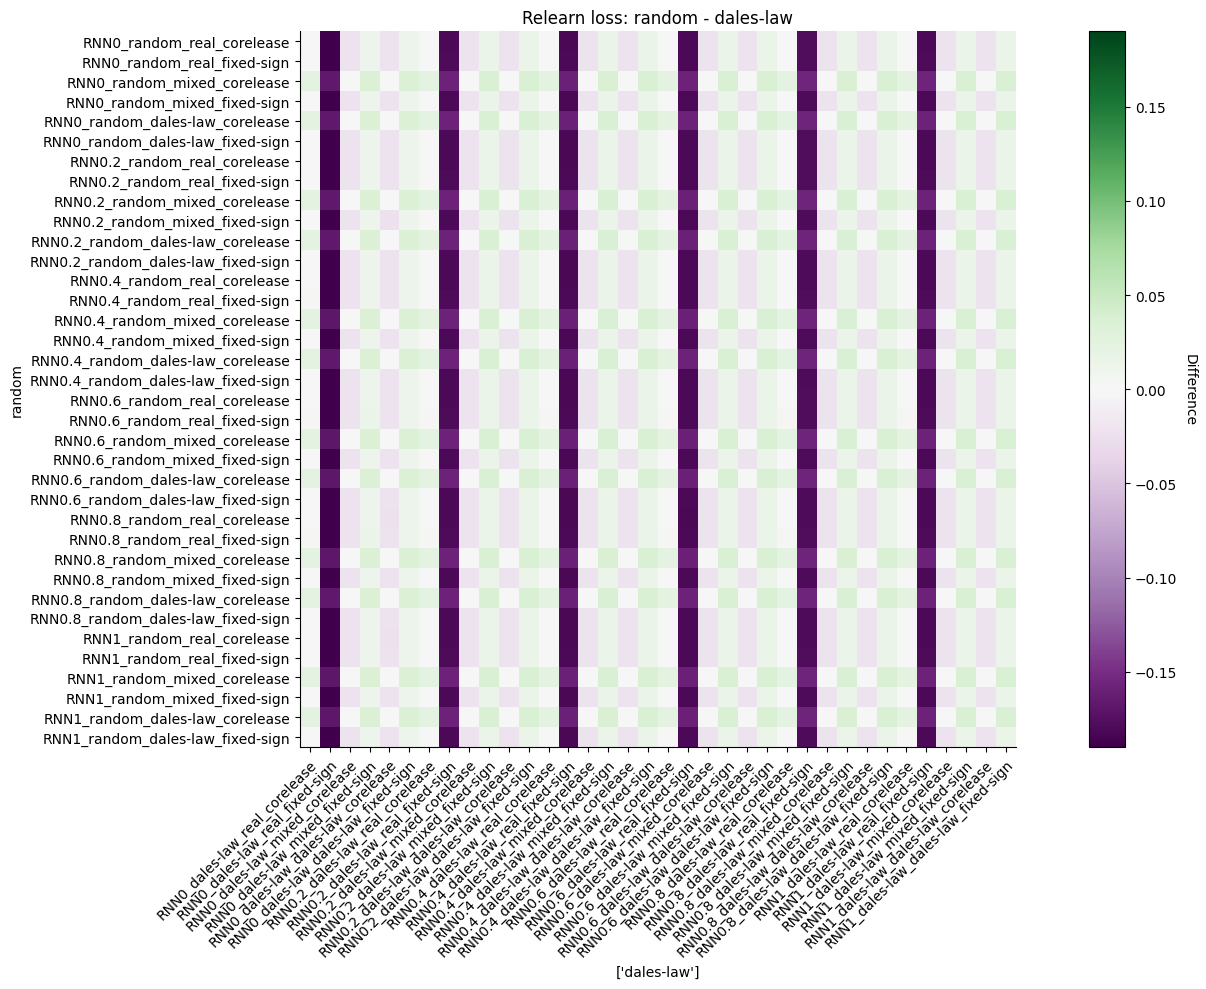

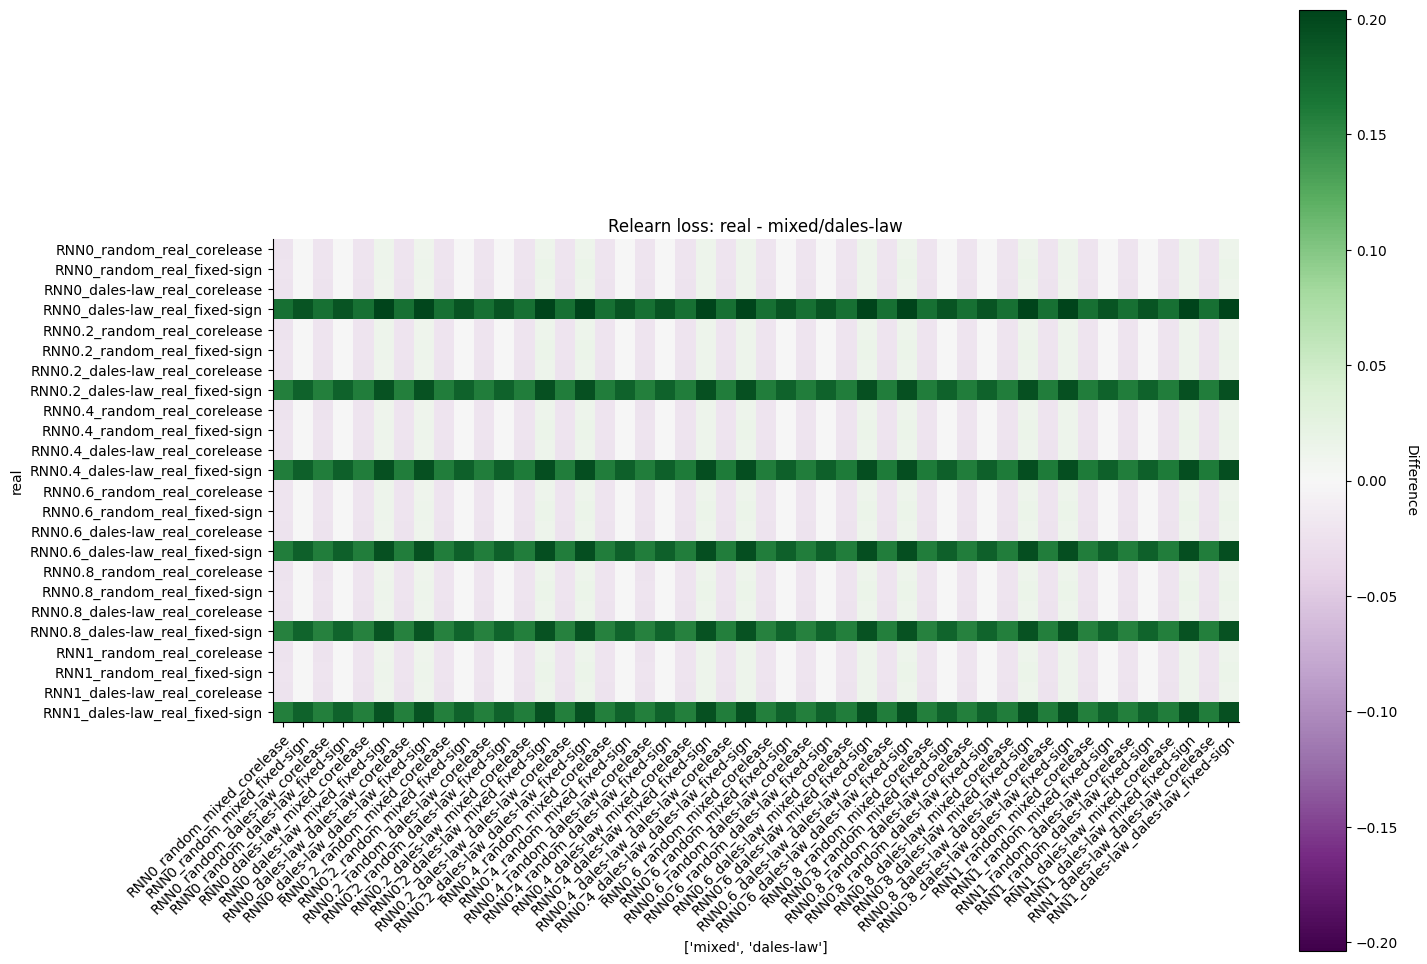

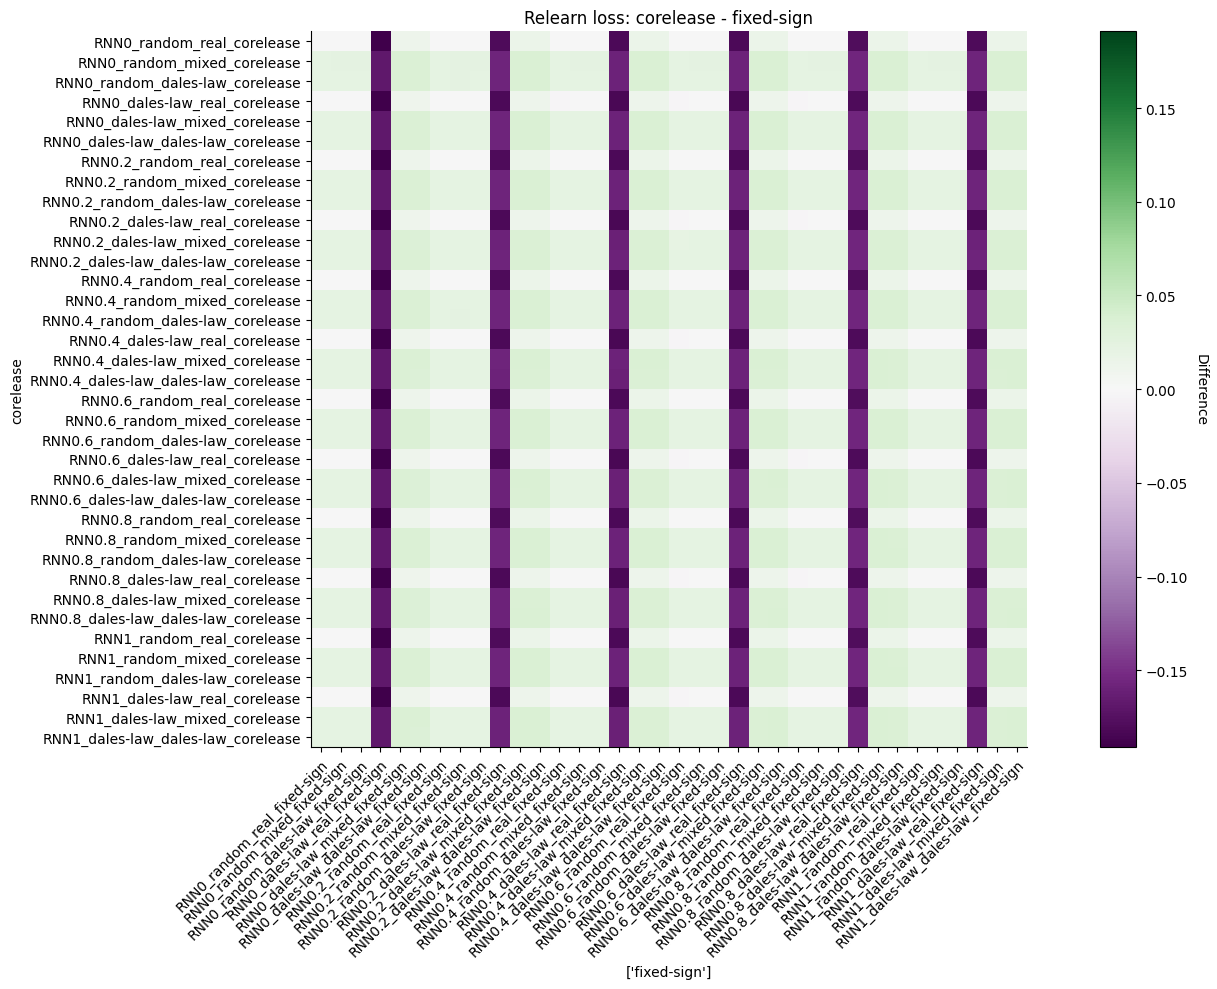

In [122]:
# Plot heatmaps to plot differences between conditions

conditions = [LHb_network, EP_LHb, LHb_DAN, update_methods]

for i, condition in enumerate(conditions):
    fig, axs = plt.subplots(1,1,figsize=(15, 10))
    # Choose network that satisfies condition
    cond_1 = condition[0]
    cond_1_networks = [network for network in training_loss_summary if cond_1 in network.split('_')[i]]
    cond_2 = condition[1:]
    cond_2_networks = [network for network in training_loss_summary if any(c in network.split('_')[i] for c in cond_2)]

    x = np.array(np.mean([np.mean(relearn_loss_summary[network],axis=1) for network in cond_1_networks],axis=1)).squeeze()
    y = np.array(np.mean([np.mean(relearn_loss_summary[network],axis=1) for network in cond_2_networks],axis=1)).squeeze()

    x_reshape = x[:,np.newaxis]
    y_reshape = y[np.newaxis,:]
    diff = x_reshape - y_reshape

    # Plot heatmap
    im = axs.imshow(diff, cmap='PRGn',vmax=abs(diff).max(), vmin=-abs(diff).max())
    axs.set_xticks(np.arange(len(cond_2_networks)))
    axs.set_yticks(np.arange(len(cond_1_networks)))
    axs.set_xticklabels(cond_2_networks)
    axs.set_yticklabels(cond_1_networks)
    axs.set_xlabel(cond_2)
    axs.set_ylabel(cond_1)
    # Rotate the tick labels and set their alignment.
    plt.setp(axs.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Set colorbar
    cbar = axs.figure.colorbar(im, ax=axs)
    cbar.ax.set_ylabel('Difference', rotation=-90, va="bottom")
    # Set title
    axs.set_title('Relearn loss: '+cond_1+' - '+'/'.join(cond_2))

In [113]:
# # Plot heatmaps to plot differences between conditions

# fig, axs = plt.subplots(2,2,figsize=(15, 10))

# conditions = [LHb_network, EP_LHb, LHb_DAN, update_methods]

# for i, condition in enumerate(conditions):
#     # Choose network that satisfies condition
#     cond_1 = condition[0]
#     cond_1_networks = [network for network in training_loss_summary if cond_1 in network.split('_')[i]]
#     cond_2 = condition[1:]
#     cond_2_networks = [network for network in training_loss_summary if any(c in network.split('_')[i] for c in cond_2)]

#     x = np.array(np.mean([np.mean(training_loss_summary[network],axis=1) for network in cond_1_networks],axis=1)).squeeze()
#     y = np.array(np.mean([np.mean(training_loss_summary[network],axis=1) for network in cond_2_networks],axis=1)).squeeze()

#     x_reshape = x[:,np.newaxis]
#     y_reshape = y[np.newaxis,:]
#     diff = x_reshape - y_reshape

#     # Plot heatmap
#     im = axs[i//2,i%2].imshow(diff, cmap='PRGn',vmax=abs(diff).max(), vmin=-abs(diff).max())
#     axs[i//2,i%2].set_xticks(np.arange(len(cond_2_networks)))
#     axs[i//2,i%2].set_yticks(np.arange(len(cond_1_networks)))
#     axs[i//2,i%2].set_xticklabels(cond_2_networks)
#     axs[i//2,i%2].set_yticklabels(cond_1_networks)
#     axs[i//2,i%2].set_xlabel(cond_2)
#     axs[i//2,i%2].set_ylabel(cond_1)
#     # Rotate the tick labels and set their alignment.
#     plt.setp(axs[i//2,i%2].get_xticklabels(), rotation=45, ha="right",
#              rotation_mode="anchor")
#     # Set colorbar
#     cbar = axs[i//2,i%2].figure.colorbar(im, ax=axs[i//2,i%2])
#     cbar.ax.set_ylabel('Difference', rotation=-90, va="bottom")
#     # Set title
#     axs[i//2,i%2].set_title('Training loss: '+cond_1+' - '+'/'.join(cond_2))

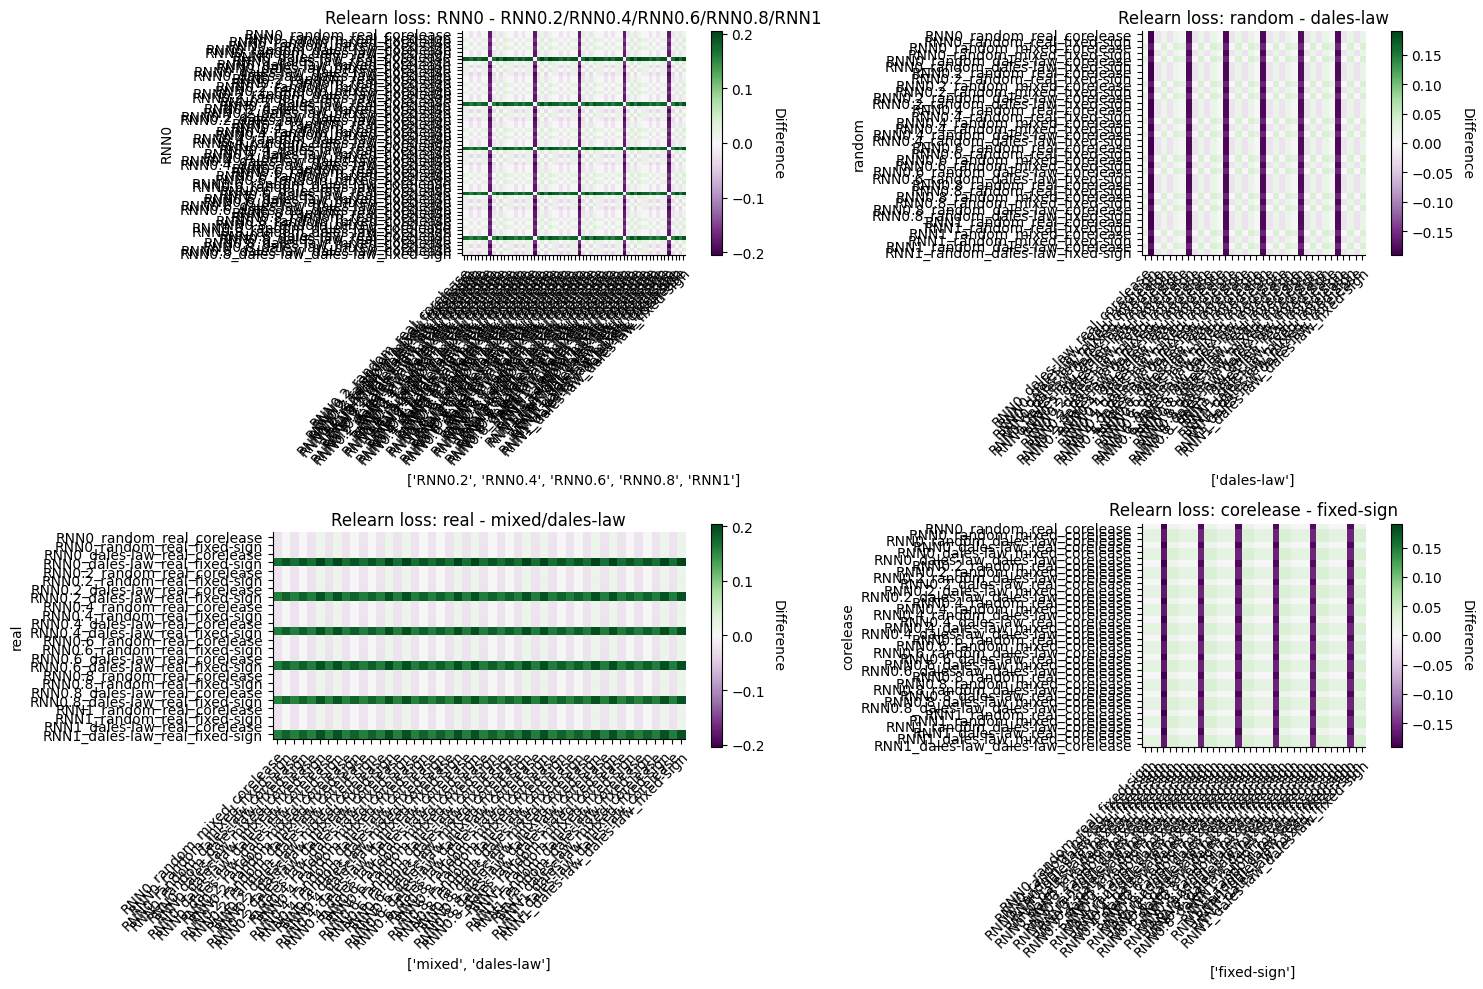

In [97]:
# # Plot heatmaps to plot differences between conditions

# fig, axs = plt.subplots(2,2,figsize=(15, 10))

# conditions = [LHb_network, EP_LHb, LHb_DAN, update_methods]

# for i, condition in enumerate(conditions):
#     # Choose network that satisfies condition
#     cond_1 = condition[0]
#     cond_1_networks = [network for network in training_loss_summary if cond_1 in network.split('_')[i]]
#     cond_2 = condition[1:]
#     cond_2_networks = [network for network in training_loss_summary if any(c in network.split('_')[i] for c in cond_2)]

#     x = np.array(np.mean([np.mean(relearn_loss_summary[network],axis=1) for network in cond_1_networks],axis=1)).squeeze()
#     y = np.array(np.mean([np.mean(relearn_loss_summary[network],axis=1) for network in cond_2_networks],axis=1)).squeeze()

#     x_reshape = x[:,np.newaxis]
#     y_reshape = y[np.newaxis,:]
#     diff = x_reshape - y_reshape

#     # Plot heatmap
#     im = axs[i//2,i%2].imshow(diff, cmap='PRGn',vmax=abs(diff).max(), vmin=-abs(diff).max())
#     axs[i//2,i%2].set_xticks(np.arange(len(cond_2_networks)))
#     axs[i//2,i%2].set_yticks(np.arange(len(cond_1_networks)))
#     axs[i//2,i%2].set_xticklabels(cond_2_networks)
#     axs[i//2,i%2].set_yticklabels(cond_1_networks)
#     axs[i//2,i%2].set_xlabel(cond_2)
#     axs[i//2,i%2].set_ylabel(cond_1)
#     # Rotate the tick labels and set their alignment.
#     plt.setp(axs[i//2,i%2].get_xticklabels(), rotation=45, ha="right",
#              rotation_mode="anchor")
#     # Set colorbar
#     cbar = axs[i//2,i%2].figure.colorbar(im, ax=axs[i//2,i%2])
#     cbar.ax.set_ylabel('Difference', rotation=-90, va="bottom")
#     # Set title
#     axs[i//2,i%2].set_title('Relearn loss: '+cond_1+' - '+'/'.join(cond_2))

## RNN sparsity vs performance

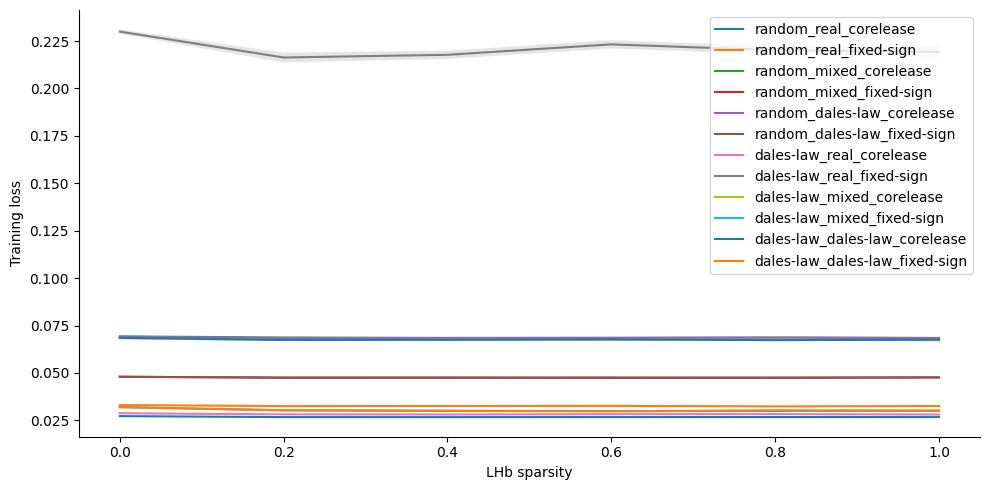

In [98]:
# RNN sparsity vs training loss
fig, axs = plt.subplots(1,1,figsize=(10, 5))

for eplhb in EP_LHb:
    for lhbdan in LHb_DAN:
        for update in update_methods:
            networks = [network for network in training_loss_summary if eplhb in network.split('_')[1] and lhbdan in network.split('_')[2] and update in network.split('_')[3]]
            mean_tloss_sparse, sem_tloss_sparse = [],[]
            for idx, network in enumerate(networks):
                network_mean = np.mean(training_loss_summary.get(network),axis=1)
                mean_tloss_sparse.append(np.mean(network_mean))
                sem_tloss_sparse.append(stats.sem(network_mean))

            # Plot mean and sem
            mean_tloss_sparse = np.array(mean_tloss_sparse)
            sem_tloss_sparse = np.array(sem_tloss_sparse)
            axs.plot(LHb_sparsity,mean_tloss_sparse, label=eplhb+'_'+lhbdan+'_'+update)
            axs.fill_between(LHb_sparsity,mean_tloss_sparse+sem_tloss_sparse,mean_tloss_sparse-sem_tloss_sparse,alpha=0.2)

axs.set_xlabel('LHb sparsity')
axs.set_ylabel('Training loss')
axs.legend()  
plt.show()

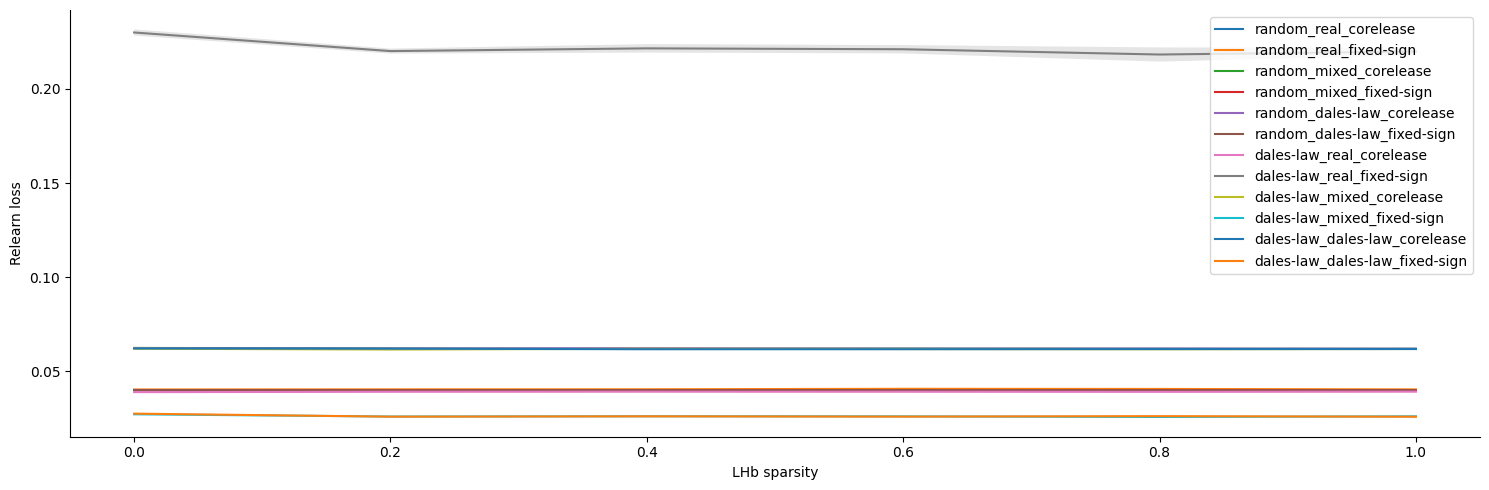

In [99]:
# RNN sparsity vs relearn loss
fig, axs = plt.subplots(1,1,figsize=(15, 5))

for eplhb in EP_LHb:
    for lhbdan in LHb_DAN:
        for update in update_methods:
            networks = [network for network in relearn_loss_summary if eplhb in network.split('_')[1] and lhbdan in network.split('_')[2] and update in network.split('_')[3]]
            mean_rloss_sparse, sem_rloss_sparse = [],[]
            for idx, network in enumerate(networks):
                network_mean = np.mean(relearn_loss_summary.get(network),axis=1)
                mean_rloss_sparse.append(np.mean(network_mean))
                sem_rloss_sparse.append(stats.sem(network_mean))

            # Plot mean and sem
            mean_rloss_sparse = np.array(mean_rloss_sparse)
            sem_rloss_sparse = np.array(sem_rloss_sparse)
            axs.plot(LHb_sparsity,mean_rloss_sparse, label=eplhb+'_'+lhbdan+'_'+update)
            axs.fill_between(LHb_sparsity,mean_rloss_sparse+sem_rloss_sparse,mean_rloss_sparse-sem_rloss_sparse,alpha=0.2)

axs.set_xlabel('LHb sparsity')
axs.set_ylabel('Relearn loss')
axs.legend()  
plt.show()